In [2]:
from cvrp_algorithms import SimpleAco, AcoSigmaBestAnts, AcoImprovedPheromoneUpdate, Aco2opt, Greedy
import cvrpcases as cvrp
from array import *
import math
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib.backends.backend_pdf import PdfPages

def listToString(firstLine, list):  
    str1 = firstLine + "\n"    
    for ele in list:  
        str1 += str(ele)+'\n' 
    str1 = str1[:-2] 
    return str1

In [2]:
start = time.time()
algorithm = SimpleAco(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=100, max_iterations=1, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=20, seed = 78)
solution, path = algorithm.compute(log_level=0)
end = time.time()
reftime = end - start

In [3]:
def binarySearchAntsCount(refTime,iterations, mincount = 1,maxcount = 100):
    #print(mincount)
    #print(maxcount)
    #print("********************")
    if(mincount == maxcount):
        algorithm = SimpleAco(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), mincount, max_iterations=iterations, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = 78)
        start = time.time()
        solution, path = algorithm.compute(log_level=0)
        tim = time.time()-start
        #print(tim)
        #print("**********")
        return tim, solution, mincount
    if(maxcount - mincount == 1):
        algorithm1 = SimpleAco(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), mincount, max_iterations=iterations, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = 78)
        start1 = time.time()
        solution1, path1 = algorithm1.compute(log_level=0)
        end1 = time.time()
        algorithm2 = SimpleAco(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), maxcount, max_iterations=iterations, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = 78)
        start2 = time.time()
        solution2, path2 = algorithm1.compute(log_level=0)
        end2 = time.time()
        if(abs(refTime - end1 + start1)<=abs(refTime - end2 + start2)):
            #print(end1-start1)
            #print("**********")
            return end1-start1, solution1, mincount
        #print(end1-start1)
        #print("**********")
        return end2-start2, solution2, maxcount
    algorithm = SimpleAco(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), math.floor((maxcount + mincount)/2), max_iterations=iterations, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = 78)
    start = time.time()
    solution, path = algorithm.compute(log_level=0)
    time1 = time.time() - start
    if(time1>=refTime):
        return binarySearchAntsCount(refTime,iterations,mincount,math.floor((maxcount + mincount)/2))
    #print("Im here")
    #print(time1)
    #print(math.floor((maxcount + mincount)/2))
    return binarySearchAntsCount(refTime,iterations,math.floor((maxcount + mincount)/2),maxcount)

In [4]:
mas = time.time()
res = np.zeros((16,5))
times = np.zeros((16,5))
ants = np.zeros((16,5))
for seed in range(0,5):
    start = time.time()
    algorithm = SimpleAco(cvrp.load_case(r'datasets\A\A-n32-k5.vrp'), ants_count=1000, max_iterations=1, alpha=2, beta=5, evaporation_rate=0.6, pheromone_amount=0, seed = seed)
    res[0][seed], path = algorithm.compute(log_level=0)
    end = time.time()
    times[0][seed] = end - start
    ants[0][seed] = 10000
    for it in range(0,15):
        times[it+1][seed], res[it+1][seed], ants[it+1][seed] = binarySearchAntsCount(times[0][seed],it+2,1,ants[it][seed])
        print(it)
print(time.time() - mas)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
0
1
2
3


KeyboardInterrupt: 

In [28]:
print(times)
print(ants)
print(res)

[[4.03321099 3.83975959 3.79880714 3.76288748 4.92482376]
 [4.10003328 4.08108473 3.62233996 3.73600316 4.94374251]
 [4.05576825 3.06277156 3.82872272 3.88161635 5.42648435]
 [3.19342399 3.3400321  3.70109892 3.40788412 3.45873737]
 [4.13191557 3.54847527 3.71107459 3.53257942 3.46968603]
 [3.99229383 3.95438766 3.91452575 3.98135066 4.06209755]
 [4.2556138  3.7898612  3.77988672 3.68913245 4.90783882]
 [4.28653598 3.16553211 3.71705437 3.73999667 4.93280411]
 [3.59735537 3.86018682 3.85767865 3.63427663 4.99663162]
 [2.44349766 3.88464189 3.95541835 3.59936857 5.89824915]
 [2.59203553 3.68616843 3.91257191 4.25062752 5.04276538]]
[[5000. 5000. 5000. 5000. 5000.]
 [ 469.  469.  497.  490.  703.]
 [ 308.  235.  358.  332.  439.]
 [ 207.  190.  242.  166.  232.]
 [ 197.  189.  190.  166.  187.]
 [ 160.  171.  166.  161.  186.]
 [ 140.  138.  136.  139.  185.]
 [ 122.  111.  123.  122.  166.]
 [  61.  109.  108.  110.  146.]
 [  60.  103.  102.  102.  127.]
 [  59.   84.   91.   89.   96.

In [47]:
print(res[:,0])

[1072.95656778  867.17328329  864.20322847  840.7805067   851.96384552
  846.73929562  846.73929562  846.31877975  911.19482878  911.19482878
  932.28442189]


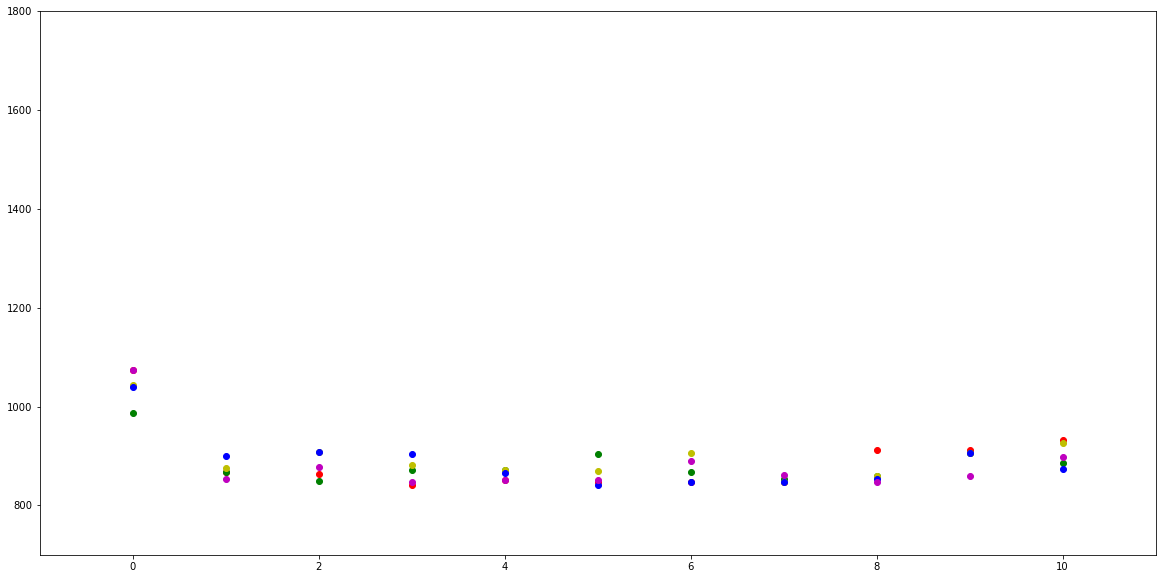

In [51]:
plt.figure(figsize=(20,10))
plt.plot(range(0,11,1), res[:,0], 'ro',range(0,11,1), res[:,1], 'go',range(0,11,1), res[:,2], 'yo',range(0,11,1), res[:,3], 'bo', range(0,11,1), res[:,4], 'mo')
plt.axis([-1, 11, 700, 1800])
plt.show()